# 等間隔で並べた場合について調べる

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import json
from lib.ds2s_OV_x0 import ds2s_OV_x0
from lib.funcs import *

In [2]:
data = {}
for id, K in enumerate(range(101)):
	model = ds2s_OV_x0(
		L=10.0,
		K=K,
		n_0=5,
		x_0=0.1,
		v_0=0.7,
		dt=1.0,
		dx=0.1,
		x_init=np.array([10.0 / K * i for i in range(K)], dtype=np.float128),
		n_max=2010,
	)
	model.simulate()
	js = model.get_json()
	js["flow"] = { "1900 2000": model.flow(1900, 2000) }
	data[id] = js

In [3]:
density = [js["density"] for js in data.values()]
flow = [js["flow"]["1900 2000"] for js in data.values()]

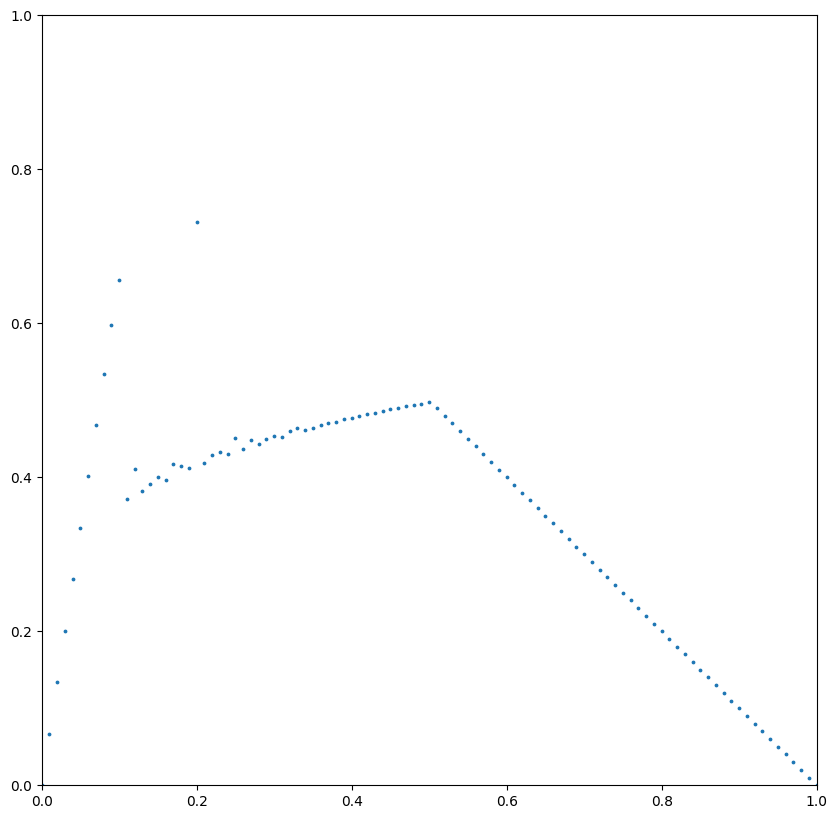

In [4]:
plot_fundamental(density, flow)

In [5]:
# flowが以上に大きい場所のデータを表示
data[flow.index(max(flow))]

{'L': 10.0,
 'K': 20,
 'n_0': 5,
 'x_0': 0.1,
 'v_0': 0.7,
 'dt': 1.0,
 'dx': 0.1,
 'x_init': [0.0,
  0.5,
  1.0,
  1.5,
  2.0,
  2.5,
  3.0,
  3.5,
  4.0,
  4.5,
  5.0,
  5.5,
  6.0,
  6.5,
  7.0,
  7.5,
  8.0,
  8.5,
  9.0,
  9.5],
 'density': 0.2,
 'flow': {'1900 2000': 0.7313272590397483}}

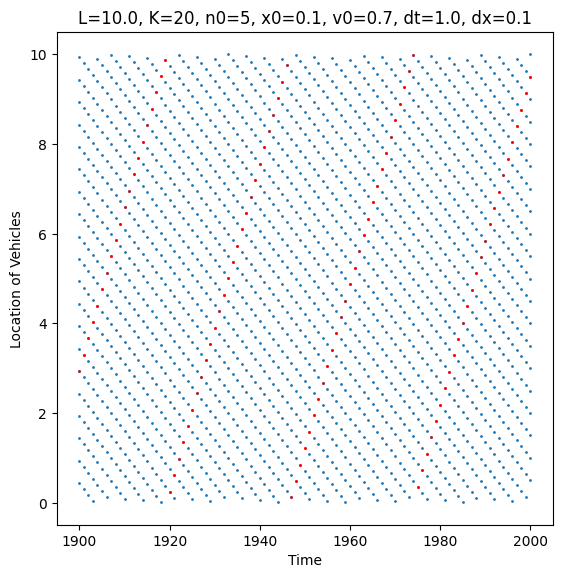

In [7]:
model = ds2s_OV_x0.from_json(data[flow.index(max(flow))], n_max=2010)
model.simulate()
plot_pattern(model, 1900, 2000)

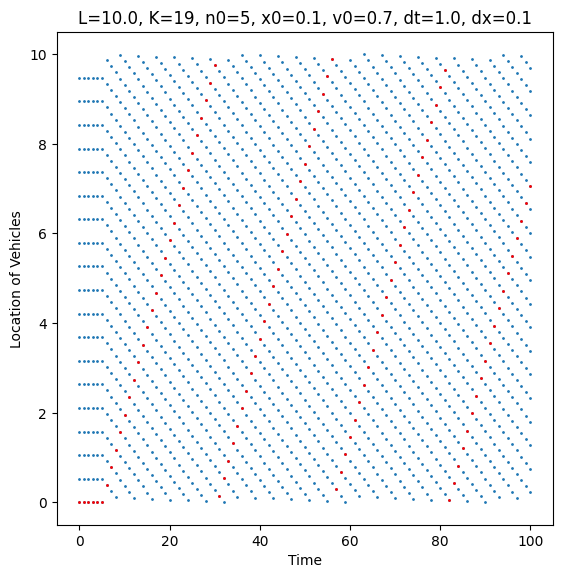

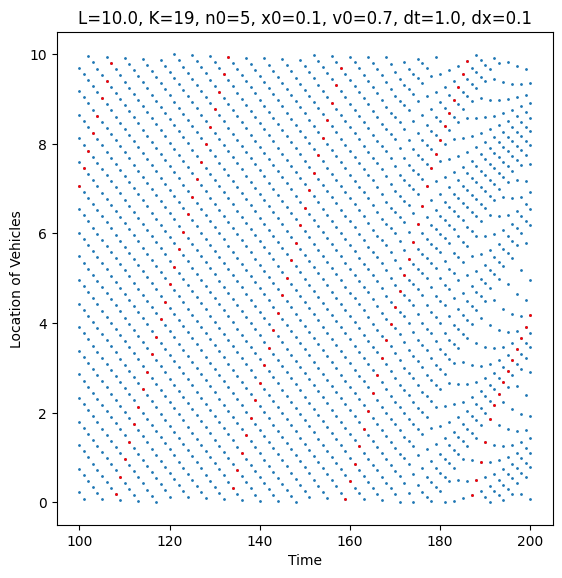

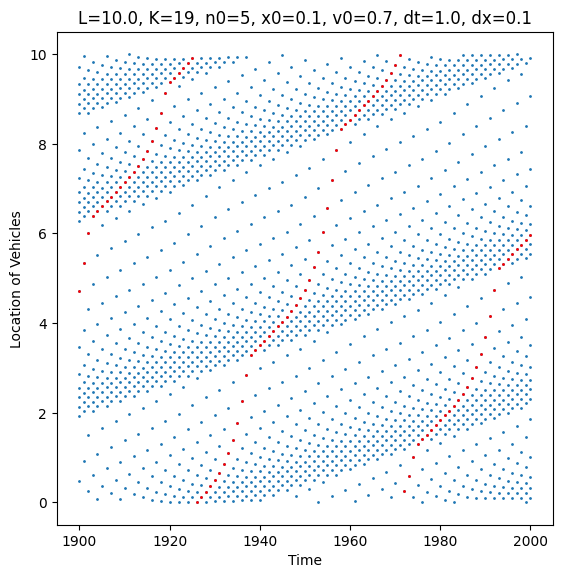

In [13]:
# その前後の、flowが小さい場所のシミュレーション
model = ds2s_OV_x0.from_json(data[flow.index(max(flow)) - 1], n_max=2010)
model.simulate()
plot_pattern(model, 0, 100)
plot_pattern(model, 100, 200)
plot_pattern(model, 1900, 2000)

In [ ]:
model = ds2s_OV_x0.from_json(data[flow.index(max(flow)) + 1], n_max=2010)
model.simulate()
plot_pattern(model, 1900, 2000)